# K Nearest Neighbors Evaluation with artificial data

In [3]:
# Science imports
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default. 
sns.set_style("darkgrid") # set a grey grid as a background

# ML imports
import sklearn
from sklearn import metrics
# Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Logistic Regression
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# turn off warnings
import warnings
warnings.filterwarnings('ignore')



## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [4]:
df = pd.read_csv("KNN_Project_Data")

**Check the head of the dataframe.**

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA
**Artificial Data - no patterns**

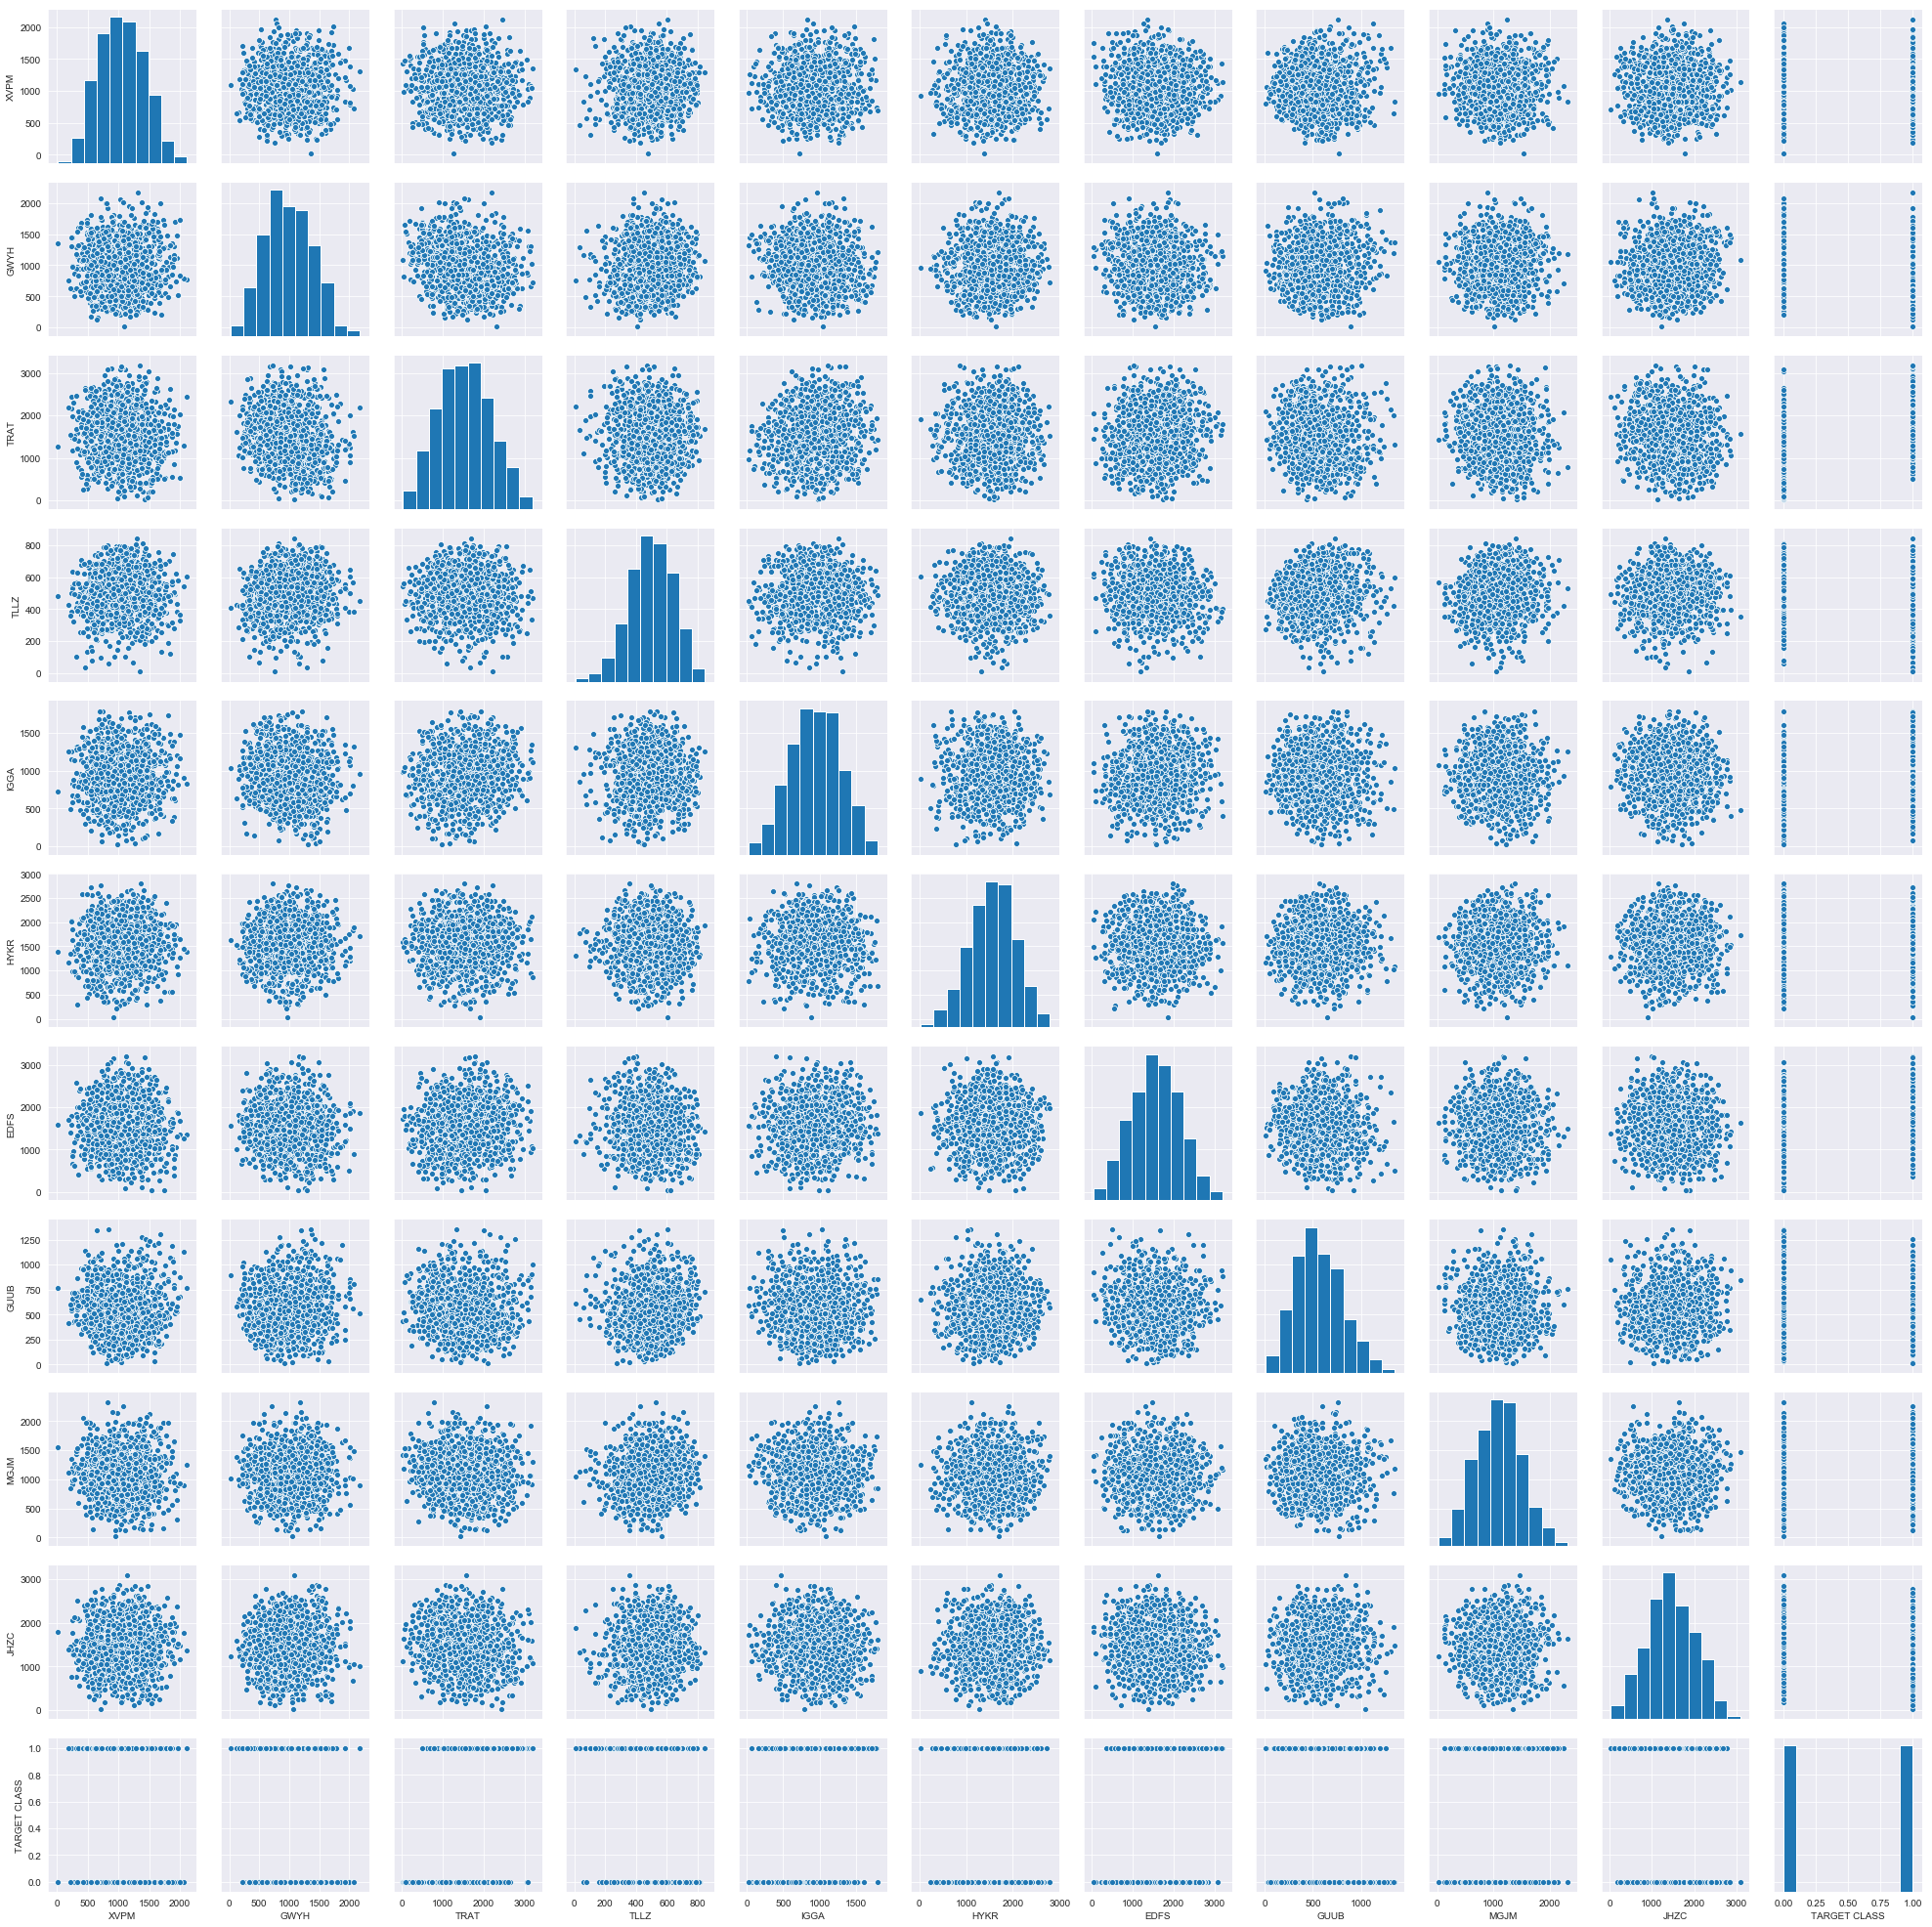

In [9]:
# hue 'TARGET CLASS' failing in this version of Seaborn
sns.pairplot(df)

# Standardize the Variables

**Importing StandardScaler from Scikit learn.**

In [10]:
from sklearn.preprocessing import StandardScaler

**Creating a StandardScaler() object called scaler.**

In [11]:
scaler = StandardScaler()

**Fitting scaler to the features.**

In [12]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [13]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [14]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [15]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Train Test Split
## Using KNN and fitting training data
## Return Confusion Matrix

In [17]:
# Import the correct model 
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# set input vars
X = df_feat
y = df['TARGET CLASS']
# The Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# Create the classifier object
knn = KNeighborsClassifier(n_neighbors=1)
# perform the fit
knn.fit(X_train,y_train)
# Make predictions
predictions = knn.predict(X_test)

# Printing results
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



[[109  43]
 [ 41 107]]


## Using the elbow method to pick a good K Value

**Creating a for loop that trains various KNN models with different k values, then evaluating the error_rate for each of these models with a list.**

In [21]:
# Will take a little time to run
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #The average where the predictions weren't equal to test values
    


In [28]:
error_rate

[0.28,
 0.29,
 0.21666666666666667,
 0.22,
 0.20666666666666667,
 0.21,
 0.18333333333333332,
 0.19,
 0.19,
 0.17666666666666667,
 0.18333333333333332,
 0.18333333333333332,
 0.18333333333333332,
 0.18,
 0.18,
 0.18,
 0.17,
 0.17333333333333334,
 0.17666666666666667,
 0.18333333333333332,
 0.17666666666666667,
 0.18333333333333332,
 0.16666666666666666,
 0.18,
 0.16666666666666666,
 0.17,
 0.16666666666666666,
 0.17333333333333334,
 0.16666666666666666,
 0.17333333333333334,
 0.16,
 0.16666666666666666,
 0.17333333333333334,
 0.17333333333333334,
 0.17,
 0.16666666666666666,
 0.16,
 0.16333333333333333,
 0.16]

In [27]:
sum(error_rate) / len(error_rate)

0.18393162393162393

**Visualizing the error rates**

Text(0, 0.5, 'Error Rate')

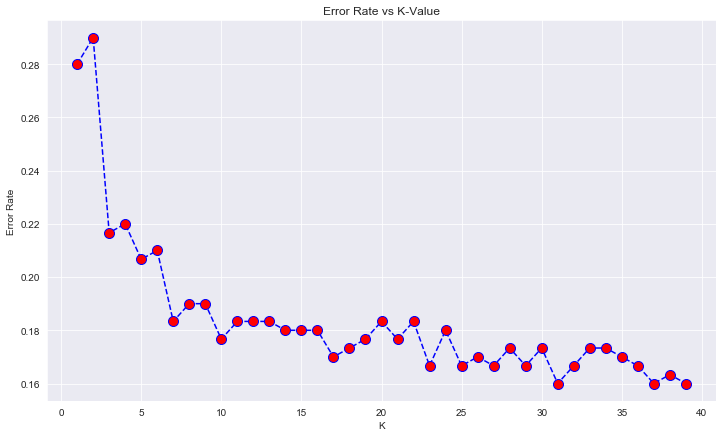

In [22]:
plt.figure(figsize=(12,7))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retraining the model with an improve K Value (n_neighbors=31), then re-running the classification report and the confusion matrix.**

In [31]:
# set input vars
X = df_feat
y = df['TARGET CLASS']
# The Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# Create the classifier object
knn = KNeighborsClassifier(n_neighbors=31)
# perform the fit
knn.fit(X_train,y_train)
# Make predictions
predictions = knn.predict(X_test)

# Printing results
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

   micro avg       0.84      0.84      0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



[[123  29]
 [ 19 129]]


### final evaluation
**Original with 1, final with 31**

#### n_neighbors=1
precision    recall  f1-score   support  
0       0.73      0.72      0.72       152  

vs
#### n_neighbors=31
precision    recall  f1-score   support  
0       0.87      0.81      0.84       152